In [1]:
import pandas as pd

In [2]:
#Importing the dataset
data = pd.read_csv(r"C:\zubeda\PGA02_Zubu\Machine Learning Models\SVM\apples_and_oranges.csv")
data.head()

,Weight,Size,Class
0,69,4.39,orange
1,69,4.21,orange
2,65,4.09,orange
3,72,5.85,apple
4,67,4.70,orange


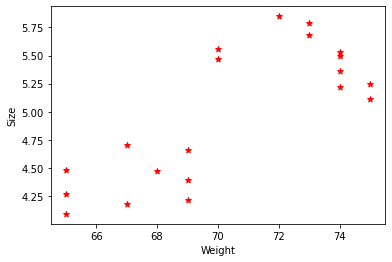

In [3]:
#Visualizing the distribution
import matplotlib.pyplot as plt
%matplotlib inline
plt.xlabel('Weight')
plt.ylabel('Size')
plt.scatter(data['Weight'], data['Size'], color='red', marker='*')
plt.show()

In [4]:
#Splitting the dataset into training and test samples
from sklearn.model_selection import train_test_split
training_set, test_set = train_test_split(data, test_size=0.2, random_state=1)

In [5]:
#Classifying the predictors and target
X_train = training_set.iloc[:, 0:2].values
Y_train = training_set.iloc[:, 2].values
X_test = test_set.iloc[:, 0:2].values
Y_test = test_set.iloc[:, 2].values
#iloc gets rows (and/or columns) at integer locations

In [6]:
#Initializing Support Vector Machine and fitting the training data
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state=1)
classifier.fit(X_train, Y_train)

#In machine learning, the radial basis function kernel, or RBF kernel, is a popular kernel function
#used in various kernelized learning algorithms. In particular, it is commonly used in support vector
#machine classification
#Radial Basis Kernel is a kernel function that is used in machine learning to find a non-linear
#classifier or regression line.
#The above is true when SVM is used to handle regression problems.

SVC(random_state=1)

In [7]:
#Predicting the classes for test set
Y_pred = classifier.predict(X_test)

In [8]:
#Attaching predictions to test set for comparing
test_set["Predictions"] = Y_pred

<ipython-input-8-34af06862ad7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set["Predictions"] = Y_pred


In [9]:
#Comparing the actual classes and predictions
test_set

,Weight,Size,Class,Predictions
3,72,5.85,apple,apple
16,69,4.66,orange,orange
6,70,5.56,apple,apple
10,73,5.79,apple,apple


In [10]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
accuracy = float(cm.diagonal().sum()) / len(Y_test)
print("\nAccuracy of SVM for the given dataset: ", accuracy)

[[3 0]
 [0 1]]

Accuracy of SVM for the given dataset:  1.0
